In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

**13. In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use set.seed(1) prior to
starting part (a) to ensure consistent results.
(a) Using the rnorm() function, create a vector, x , containing 100
observations drawn from a N(0,1) distribution. This represents
a feature, X.**

In [2]:
np.random.seed(1)
x =  np.random.normal(loc = 0.0, scale = 1.0, size = 100)

**(b) Using the rnorm() function, create a vector, eps , containing 100
observations drawn from a N(0,0.25) distribution i.e. a normal
distribution with mean zero and variance 0.25.**

In [3]:
eps =  np.random.normal(loc = 0.0, scale = 0.25, size = 100)

**(c) Using x and eps , generate a vector y according to the model
Y = −1 + 0.5X + ?. (3.39)
What is the length of the vector y ? What are the values of β 0
and β 1 in this linear model?**

In [4]:
y = -1 + 0.5*x + eps

In [5]:
len(y)

100

y长度为1，belta0为-1，belta1为0.5

**(d) Create a scatterplot displaying the relationship between x and
y . Comment on what you observe.**

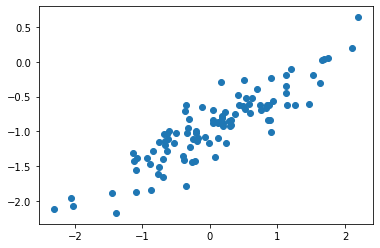

In [6]:
#散点图呈现明显的线性关系
plt.scatter(x,y)
plt.show()

**(e) Fit a least squares linear model to predict y using x . Comment
on the model obtained. How do
ˆ
β 0 and
ˆ
β 1 compare to β 0 and
β 1 ?**

In [7]:
data = pd.DataFrame({'x':x,'y':y})
result_smf = smf.ols('y ~ x',data).fit()
result_smf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           5.39e-36
Time:                        10:06:48   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.000      -1.010      -0.917
x              0.5239      0.026     19.783      0.000       0.471       0.576
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 ˆ β 0 及 ˆ β 1 与 β 0 及 β 1 有一定偏差，但β 0 及 β 1 均位于 ˆ β 0 及 ˆ β 1 的95%置信空间以内

**(f) Display the least squares line on the scatterplot obtained in (d).
Draw the population regression line on the plot, in a different
color. Use the legend() command to create an appropriate leg-
end.**

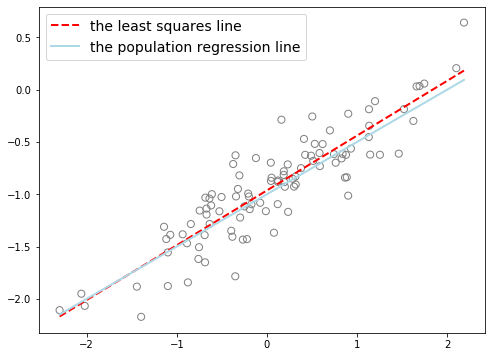

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='', marker='o', edgecolors='gray', s=50)
X_draw = np.linspace(x.min(), x.max(), 50)
plt.plot(X_draw,result_smf.params[0] + result_smf.params[1] * X_draw,'red',linewidth= 2,linestyle='--',label = 'the least squares line')
plt.plot(X_draw,-1 + 0.5 * X_draw,'lightblue',linewidth= 2,label = 'the population regression line')
plt.legend(loc="upper left", fontsize=14)
plt.show()

**(g) Now fit a polynomial regression model that predicts y using x
and x 2 . Is there evidence that the quadratic term improves the
model fit? Explain your answer.**

In [9]:
result_smf_polynomial_2 = smf.ols('y ~ x + I(x ** 2)',data).fit()
result_smf_polynomial_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Mon, 23 Dec 2019   Prob (F-statistic):           1.32e-34
Time:                        10:06:48   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.000      -1.024      -0.909
x              0.5234      0.027     19.582      0.000       0.470       0.576
I(x ** 2)      0.0039      0.021      0.181      0.856      -0.038       0.046
==============================================================================
Omnibus:                        0.893   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.552
Skew:                          -0.170   Prob(JB):                        0.759
Kurtosis:                       3.132   Cond. No.                         2.10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print('no polynomial rss:',result_smf.ssr)
print('polynomial 2 rss:',result_smf_polynomial_2.ssr)
print('no polynomial rse:',result_smf.mse_resid ** 0.5)
print('polynomial 2 rse:',result_smf_polynomial_2.mse_resid ** 0.5)
print('no polynomial R-squared:',result_smf.rsquared)
print('polynomial 2 R-squared:',result_smf_polynomial_2.rsquared)
print('no polynomial pvalues:',result_smf.pvalues)
print('polynomial 2 pvalues:',result_smf_polynomial_2.pvalues)

no polynomial rss: 5.384246938749212
polynomial 2 rss: 5.382422768506043
no polynomial rse: 0.2343955957209079
polynomial 2 rse: 0.23556080854140585
no polynomial R-squared: 0.7997346204862734
polynomial 2 R-squared: 0.7998024699274676
no polynomial pvalues: Intercept    1.697125e-63
x            5.387078e-36
dtype: float64
polynomial 2 pvalues: Intercept    4.214381e-55
x            1.792548e-35
I(x ** 2)    8.565000e-01
dtype: float64


综上数据分析，多项式回归的rse/r^2得到改善，对于训练数据拟合提升，但I(x ** 2)无法拒绝0假设，故二次项未提高拟合度，属于过拟合。

**(h) Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the vari-
ance of the normal distribution used to generate the error term
? in (b). Describe your results.**

In [11]:
x =  np.random.normal(loc = 0.0, scale = 1.0, size = 100)
eps =  np.random.normal(loc = 0.0, scale = 0.01, size = 100)
y = -1 + 0.5*x + eps

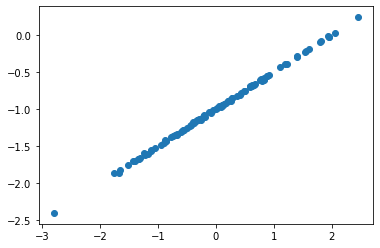

In [12]:
#重复d，散点图呈现更加明显的线性关系
plt.scatter(x,y)
plt.show()

In [13]:
#重复e， β 0 及 ˆ β 1 与 β 0 及 β 1 偏差减小，系数的标准误差也减小，R^2增大（接近1）
data = pd.DataFrame({'x':x,'y':y})
result_smf_less_noise = smf.ols('y ~ x',data).fit()
result_smf_less_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.185e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          6.80e-166
Time:                        10:06:48   Log-Likelihood:                 312.52
No. Observations:                 100   AIC:                            -621.0
Df Residuals:                      98   BIC:                            -615.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0002      0.001   -931.475      0.000      -1.002      -0.998
x              0.4994      0.001    467.445      0.000       0.497       0.502
==============================================================================
Omnibus:                        0.426   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.808   Jarque-Bera (JB):                0.121
Skew:                          -0.045   Prob(JB):                        0.941
Kurtosis:                       3.145   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

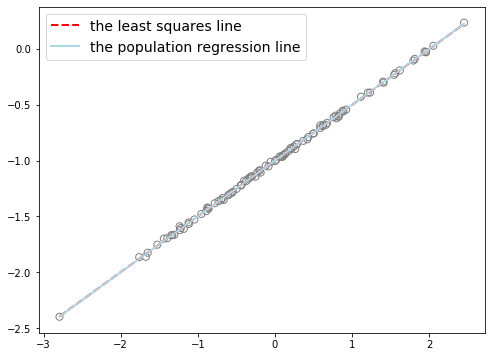

In [14]:
#重复f，最小二乘线和总体回归线趋近重合
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='', marker='o', edgecolors='gray', s=50)
X_draw = np.linspace(x.min(), x.max(), 50)
plt.plot(X_draw,result_smf_less_noise.params[0] + result_smf_less_noise.params[1] * X_draw,'red',linewidth= 2,linestyle='--',label = 'the least squares line')
plt.plot(X_draw,-1 + 0.5 * X_draw,'lightblue',linewidth= 2,label = 'the population regression line')
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [15]:
#重复g，I(x ** 2)的系数变小，仍然无法拒绝0假设
result_smf_polynomial_2_less_noise = smf.ols('y ~ x + I(x ** 2)',data).fit()
result_smf_polynomial_2_less_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.086e+05
Date:                Mon, 23 Dec 2019   Prob (F-statistic):          3.30e-163
Time:                        10:06:49   Log-Likelihood:                 312.72
No. Observations:                 100   AIC:                            -619.4
Df Residuals:                      97   BIC:                            -611.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0007      0.001   -741.462      0.000      -1.003      -0.998
x              0.4994      0.001    462.989      0.000       0.497       0.502
I(x ** 2)      0.0005      0.001      0.618      0.538      -0.001       0.002
==============================================================================
Omnibus:                        0.434   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.122
Skew:                          -0.040   Prob(JB):                        0.941
Kurtosis:                       3.151   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#重复g，结论类似，仍然无法拒绝0假设
print('no polynomial rss:',result_smf_less_noise.ssr)
print('polynomial 2 rss:',result_smf_polynomial_2_less_noise.ssr)
print('no polynomial rse:',result_smf_less_noise.mse_resid ** 0.5)
print('polynomial 2 rse:',result_smf_polynomial_2_less_noise.mse_resid ** 0.5)
print('no polynomial R-squared:',result_smf_less_noise.rsquared)
print('polynomial 2 R-squared:',result_smf_polynomial_2_less_noise.rsquared)
print('no polynomial pvalues:',result_smf_less_noise.pvalues)
print('polynomial 2 pvalues:',result_smf_polynomial_2_less_noise.pvalues)

no polynomial rss: 0.011298318813940361
polynomial 2 rss: 0.011254059516191248
no polynomial rse: 0.010737270020316493
polynomial 2 rse: 0.010771315245859392
no polynomial R-squared: 0.9995516977069884
polynomial 2 R-squared: 0.9995534538571728
no polynomial pvalues: Intercept    3.119732e-195
x            6.796599e-166
dtype: float64
polynomial 2 pvalues: Intercept    7.304234e-184
x            4.967263e-164
I(x ** 2)     5.382618e-01
dtype: float64


**(i) Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term ? in (b). Describe your results.**

In [17]:
x =  np.random.normal(loc = 0.0, scale = 1.0, size = 100)
eps =  np.random.normal(loc = 0.0, scale = 6.25, size = 100)
y = -1 + 0.5*x + eps

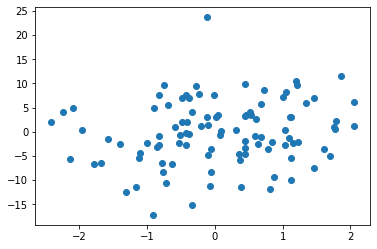

In [18]:
#重复d，散点图线性关系不明显
plt.scatter(x,y)
plt.show()

In [19]:
#重复e， β 0 及 ˆ β 1 与 β 0 及 β 1 偏差增大，系数的标准误差增大，R^2缩小（接近0），Intercept不再拒绝0假设
data = pd.DataFrame({'x':x,'y':y})
result_smf_more_noise = smf.ols('y ~ x',data).fit()
result_smf_more_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.826
Date:                Mon, 23 Dec 2019   Prob (F-statistic):             0.0959
Time:                        10:06:50   Log-Likelihood:                -328.92
No. Observations:                 100   AIC:                             661.8
Df Residuals:                      98   BIC:                             667.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2514      0.657     -0.383      0.703      -1.555       1.052
x              1.0644      0.633      1.681      0.096      -0.192       2.321
==============================================================================
Omnibus:                        3.633   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.163   Jarque-Bera (JB):                3.566
Skew:                           0.192   Prob(JB):                        0.168
Kurtosis:                       3.842   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

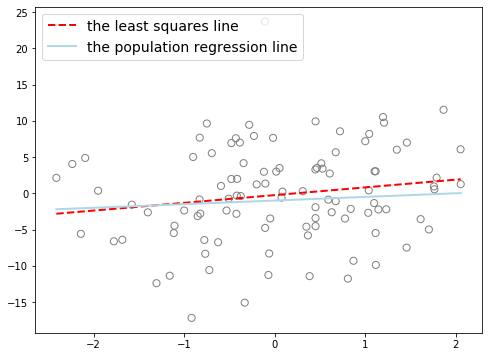

In [20]:
#重复f，最小二乘线和总体回归线相差变大
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='', marker='o', edgecolors='gray', s=50)
X_draw = np.linspace(x.min(), x.max(), 50)
plt.plot(X_draw,result_smf_more_noise.params[0] + result_smf_more_noise.params[1] * X_draw,'red',linewidth= 2,linestyle='--',label = 'the least squares line')
plt.plot(X_draw,-1 + 0.5 * X_draw,'lightblue',linewidth= 2,label = 'the population regression line')
plt.legend(loc="upper left", fontsize=14)

In [21]:
#重复g，I(x ** 2)的系数变大，仍然无法拒绝0假设
result_smf_polynomial_2_more_noise = smf.ols('y ~ x + I(x ** 2)',data).fit()
result_smf_polynomial_2_more_noise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.444
Date:                Mon, 23 Dec 2019   Prob (F-statistic):              0.241
Time:                        10:06:50   Log-Likelihood:                -328.88
No. Observations:                 100   AIC:                             663.8
Df Residuals:                      97   BIC:                             671.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4141      0.859     -0.482      0.631      -2.118       1.290
x              1.0773      0.638      1.690      0.094      -0.188       2.343
I(x ** 2)      0.1504      0.508      0.296      0.768      -0.857       1.158
==============================================================================
Omnibus:                        3.928   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.954
Skew:                           0.210   Prob(JB):                        0.138
Kurtosis:                       3.879   Cond. No.                         2.59
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
#重复g，结论类似，但两个模型都有无法拒绝0假设情况
print('no polynomial rss:',result_smf_more_noise.ssr)
print('polynomial 2 rss:',result_smf_polynomial_2_more_noise.ssr)
print('no polynomial rse:',result_smf_more_noise.mse_resid ** 0.5)
print('polynomial 2 rse:',result_smf_polynomial_2_more_noise.mse_resid ** 0.5)
print('no polynomial R-squared:',result_smf_more_noise.rsquared)
print('polynomial 2 R-squared:',result_smf_polynomial_2_more_noise.rsquared)
print('no polynomial pvalues:',result_smf_more_noise.pvalues)
print('polynomial 2 pvalues:',result_smf_polynomial_2_more_noise.pvalues)

no polynomial rss: 4212.2357120969755
polynomial 2 rss: 4208.425609055656
no polynomial rse: 6.556065669455579
polynomial 2 rse: 6.586792164718144
no polynomial R-squared: 0.02803315739173995
polynomial 2 R-squared: 0.028912332745685054
no polynomial pvalues: Intercept    0.702777
x            0.095906
dtype: float64
polynomial 2 pvalues: Intercept    0.630648
x            0.094296
I(x ** 2)    0.767602
dtype: float64


**(j) What are the confidence intervals for β 0 and β 1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.**

In [23]:
print('the original data set confidence intervals:',result_smf.conf_int())
print('the noisier data set confidence intervals:',result_smf_more_noise.conf_int())
print('the less noisy data set confidence intervals:',result_smf_less_noise.conf_int())

the original data set confidence intervals:                   0         1
Intercept -1.009870 -0.916623
x          0.471307  0.576407
the noisier data set confidence intervals:                   0         1
Intercept -1.554918  1.052160
x         -0.191988  2.320727
the less noisy data set confidence intervals:                   0         1
Intercept -1.002329 -0.998067
x          0.497322  0.501563


置信空间都包含了原有的β 值，但随着噪声变大，置信空间范围也变大